# Questao 1
O conjunto de microdados do ENEM 2022 possui 3.476.105 linhas, uma numerosidade muito grande para nosso contexto. Sua primeira tarefa é fazer a leitura do arquivo CSV por blocos e então realizar filtragem e amostragem em cada bloco para diminuir a numerosidade, salvando ao final um CSV com numerosidade reduzida. Tente alcançar uma tabela entre 50mil e 100mil linhas.
Para leitura por blocos, use a opção chunksize de read_csv

In [6]:
import pandas as pd

uf = ['AL', 'BA', 'CE', 'SE', 'RN', 'PI', 'PB', 'PE', 'MA']

db = pd.read_csv('micro_dados/DADOS/MICRODADOS_ENEM_2022.csv', encoding="cp1252",delimiter=";")
db.dropna(subset='SG_UF_ESC', inplace=True)
db_nordeste = db[(db["SG_UF_ESC"] == 'AL') | (db["SG_UF_ESC"] == 'BA') | (db["SG_UF_ESC"] == 'CE') | (db["SG_UF_ESC"] == 'SE') | (db["SG_UF_ESC"] == 'RN') | (db["SG_UF_ESC"] ==  'PI') | (db["SG_UF_ESC"] == 'PB') | (db["SG_UF_ESC"] == 'PE') | (db["SG_UF_ESC"] == 'MA')]


Para isso foi escolhido realizar um estudo de todo o nordeste para entender melhor o perfil e tendências da região.

In [7]:
print(len(db_nordeste))
print(db_nordeste.shape)

299663
(299663, 76)


In [8]:
db_nordeste.to_csv("base_dados_ml_nordeste.csv",encoding="cp1252")


Load data

In [2]:
import pandas as pd
db = pd.read_csv('base_dados_ml_nordeste.csv', encoding="cp1252")
db.dropna(inplace=True)
db.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', '

Remove-se campos que possuem valores NaN e podem resultar em erros.

In [2]:
db.shape

(216000, 77)

# Questão 2

Com base no conjunto de dados reduzido, crie um subconjunto de dados, que será utilizado para predição da faixa de notas de uma prova do ENEM.

## a)
Para este subconjunto escolha um atributo de nota de uma das provas do ENEM, selecione também 10 outros atributos não relacionados às provas (não pertencentes aos atributos da seção Dados da Prova Objetiva nem da seção Dados da Redação). 


resp: 
TP_FAIXA_ETARIA(Faixa etária):  impacto de uma idade mais jovem têm consequência nas notas por conta de uma possível saída mais próxima do ensino médio, tendo assuntos mais 'frescos'

Q002(Escolaridade da mãe): temos a ideia que escolaridade da mae pode influencia na performace do aluno

TP_ESTADO_CIVIL(Estado civil): enntende-se que diferentes estados civiels podem trazer diferentes responsabilidades, que alterem padroes de estudo e possam alterar valor de nota

TP_ST_CONCLUSAO(Situação de conclusão do ensino médio): pela situação de conclusao espera-se ter uma ideaia de preparo tecnico par o enem

TP_ESCOLA(Tipo escola do ensino médio): uma preconceito de que diferentes tipos de escola podem trazer diferentes preparações para alunos

Q005(Quantas pessoas moram na sua residência): a quantidade de pessoas na casa poderia alterar padroes de estudo dentre outros que altere a nota

Q006(Renda mensal familiar): familias de certas faixas de renda teriam acesso diferente de preparo e acesso a informação logo alteraria o proparo do aluno a prova

Q021(Tem TV por assinatura): exposição do aluno a noticias e conhecimentos em geral, que pode alterar nota de redação

Q024(Tem computador): exposição do aluno a noticias e conhecimentos em geral, que pode alterar nota de redação

Q025(Tem internet): exposição do aluno a noticias e conhecimentos em geral, que pode alterar nota de redação

### nota
entendemos que tv, computador e internet ta ligado a renda mas nao tem o q usar.

# FAZER ONE HOT ENCODE EM ESTADO CIVIL

array([[<Axes: title={'center': 'TP_FAIXA_ETARIA'}>,
        <Axes: title={'center': 'TP_ESCOLA'}>,
        <Axes: title={'center': 'Q006'}>],
       [<Axes: title={'center': 'Q024'}>,
        <Axes: title={'center': 'Q025'}>,
        <Axes: title={'center': 'TP_SEXO'}>],
       [<Axes: title={'center': 'TP_ESTADO_CIVIL'}>,
        <Axes: title={'center': 'Q021'}>,
        <Axes: title={'center': 'TP_ST_CONCLUSAO'}>],
       [<Axes: title={'center': 'Q005'}>,
        <Axes: title={'center': 'Q022'}>, <Axes: >]], dtype=object)

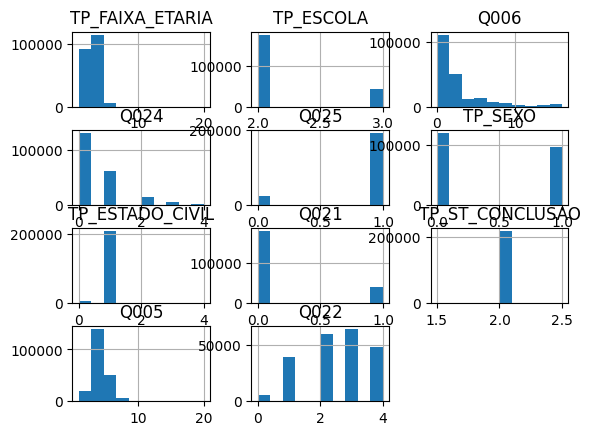

In [3]:
colunas = [ "TP_FAIXA_ETARIA", 'TP_ESCOLA', 'Q006', 'Q024', 'Q025', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'Q021', 'TP_ST_CONCLUSAO', 'Q005', 'Q022']

def get_db(colunas,db = db):
  db_ = db.get(colunas).copy()

  if 'TP_SEXO' in colunas:
      db_['TP_SEXO'] = (db_['TP_SEXO'] == 'M')* 1
  Qs =  [ a for a in colunas if a[0] == 'Q' ]#['Q025','Q024','Q006','Q022']
  for q in Qs:
    try:
      db_[q]= db_[q].apply(lambda x: ord(x) - ord('A'))
    except:
      pass
  return db_

db_ = get_db(colunas)
db_.hist(bins=10)


In [4]:
for col in colunas:
  print(f"Valores para {col}: ",dict(db_[col].value_counts()))
  print()


Valores para TP_FAIXA_ETARIA:  {3: 94946, 2: 89762, 4: 19390, 5: 5431, 1: 3131, 6: 1527, 7: 536, 11: 307, 8: 284, 9: 157, 12: 149, 10: 121, 13: 110, 14: 68, 15: 36, 16: 22, 17: 18, 18: 2, 19: 2, 20: 1}

Valores para TP_ESCOLA:  {2: 172907, 3: 43093}

Valores para Q006:  {1: 93543, 2: 32533, 3: 19128, 0: 16931, 4: 11727, 7: 8175, 6: 8001, 5: 6516, 8: 3391, 9: 2419, 16: 2380, 11: 2245, 12: 2165, 14: 1720, 15: 1713, 10: 1709, 13: 1704}

Valores para Q024:  {0: 130438, 1: 61676, 2: 14953, 3: 6097, 4: 2836}

Valores para Q025:  {1: 190569, 0: 25431}

Valores para TP_SEXO:  {0: 118918, 1: 97082}

Valores para TP_ESTADO_CIVIL:  {1: 207251, 0: 6582, 3: 1226, 2: 900, 4: 41}

Valores para Q021:  {0: 176449, 1: 39551}

Valores para TP_ST_CONCLUSAO:  {2: 216000}

Valores para Q005:  {4: 80942, 3: 57426, 5: 37765, 2: 19412, 6: 12607, 7: 4274, 8: 1708, 9: 635, 1: 562, 10: 353, 11: 106, 12: 91, 13: 39, 14: 32, 20: 16, 15: 14, 16: 8, 17: 6, 19: 3, 18: 1}

Valores para Q022:  {3: 63742, 2: 59372, 4: 48

apartir da analize de dados percebemos que "TP_ESCOLA" pode ser binarizado entre publico ou privado, sendo binarizado para true como publico e false para privado. como valoes estao em 2 e 3 nao se julga nescessario altera para 1 ou 0

<Axes: >

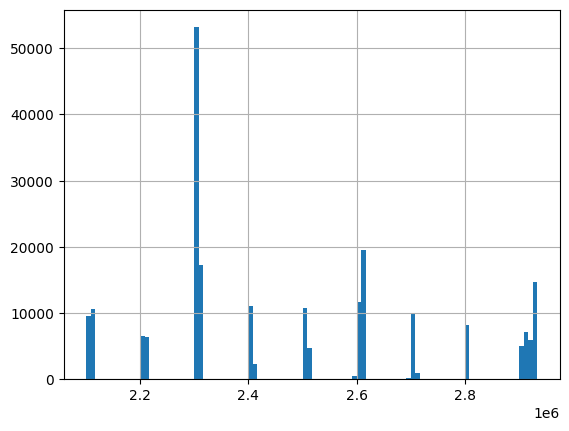

In [5]:
db['CO_MUNICIPIO_ESC'].hist(bins=100)

<Axes: >

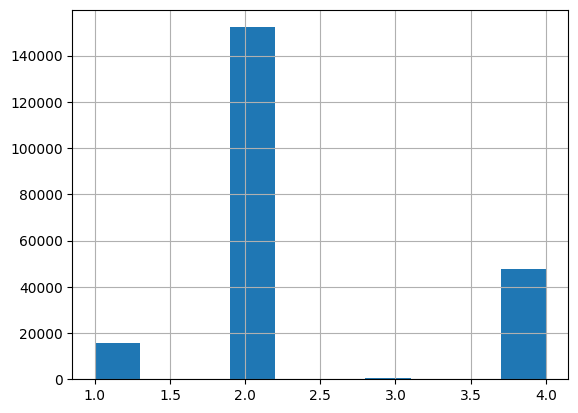

In [6]:
db['TP_DEPENDENCIA_ADM_ESC'].value_counts()
db['TP_DEPENDENCIA_ADM_ESC'].hist(bins=10)

<Axes: >

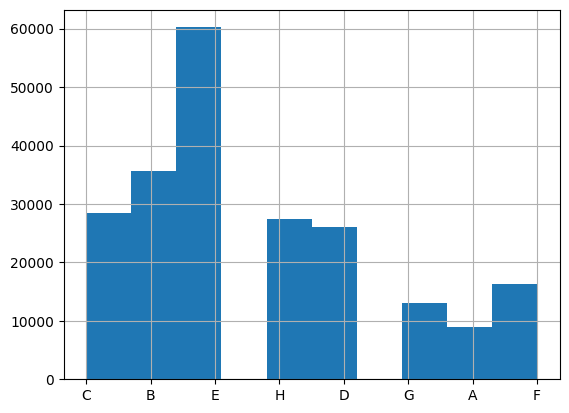

In [7]:
db['Q001'].hist(bins=10)

Apartir deste histograma excluimos: TP_ST_CONCLUSAO 

e adicionamos: Q001 ( escolaridade pai )

In [8]:
colunas = [
 'TP_FAIXA_ETARIA',
 'TP_ESCOLA',
 'Q006',
 'Q024',
 'Q025',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'Q021',
 'Q001',
 'Q005',
 'Q022']

In [9]:
db_.shape

(216000, 11)

## b)

Para o atributo de nota da prova escolhida, crie um novo atributo com a discretização da nota em 4 quartis (apresente os valores delimitantes), e seleciona somente as linhas pertencentes ao primeiro e ao quarto quartil. 


inicialmente tentamos entender esta situação das notas da redação

<Axes: >

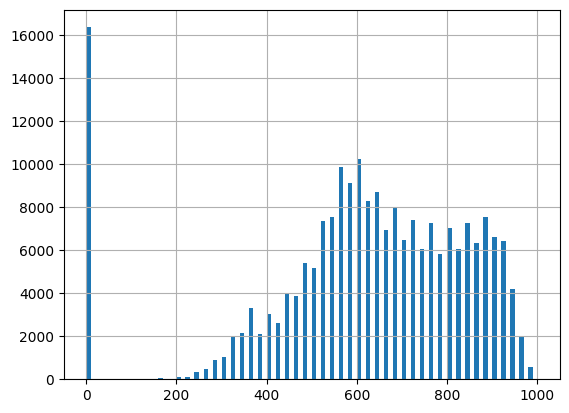

In [10]:
db['NU_NOTA_REDACAO'].hist(bins=100)

existe MUITAS notas 0, entao vamos tenta entender o porque

<Axes: >

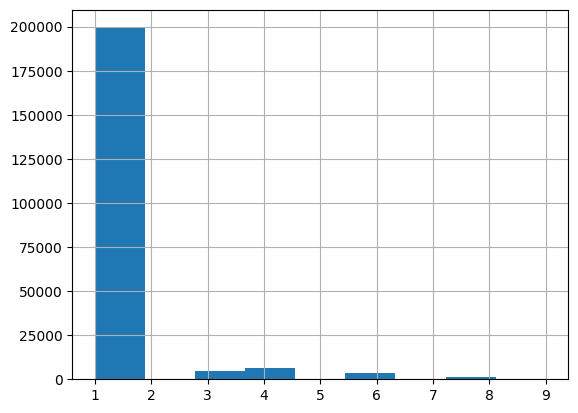

In [11]:
db["TP_STATUS_REDACAO"].hist(bins = 9)

decimos por remover todas as linhas de alunos que apresentaram algum problema na prova de redação

<Axes: >

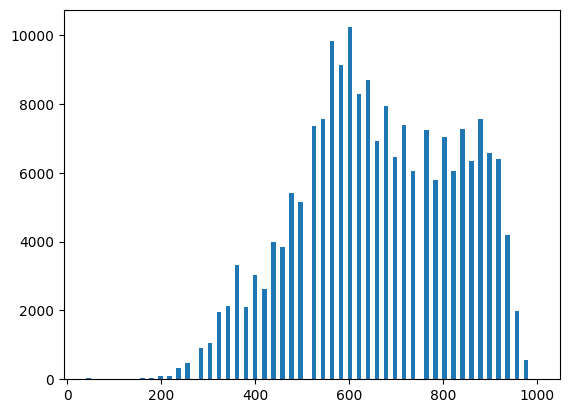

In [12]:
db_ = get_db(colunas + ['NU_NOTA_REDACAO'],db[db['TP_STATUS_REDACAO'] == 1])
db_['NU_NOTA_REDACAO'].hist(bins=100,grid=False)

In [13]:
dados = db_['NU_NOTA_REDACAO'].describe()
print(dados)
dados = dados['25%'],dados['75%']
db_redação = get_db( colunas + ['NU_NOTA_REDACAO'],db_)
db_redação = db_redação[((db_['NU_NOTA_REDACAO'] != 0) & (db_['NU_NOTA_REDACAO'] <= dados[0])) | (db_['NU_NOTA_REDACAO'] >= dados[1])].copy()
db_redação['result'] = (db_redação['NU_NOTA_REDACAO'] >= dados[1]) *1
db_redação['result'].sum(),db_redação.shape

count    199647.000000
mean        661.734962
std         167.956363
min          40.000000
25%         540.000000
50%         660.000000
75%         800.000000
max        1000.000000
Name: NU_NOTA_REDACAO, dtype: float64


(53977, (105616, 13))

## c)

Analise os demais atributos, verifique os valores existentes e sua distribuição, verifique a existência de dados ausentes. Determine e realize os procedimentos de pré-processamento necessários. Pode ser necessário transformar atributos categóricos (por exemplo, transformando alguns valores categóricos em um valor único, ou aplicando one-hot-encoding). Pode ser necessário normalizar ou padronizar atributos. Pode haver demanda de imputar valores ou excluir linhas com dados ausentes. Você pode também criar/transformar outros atributos (por exemplo, discretizando valores numéricos, combinando dois atributos em um único atributo).


In [14]:
db_redação.dropna(inplace=True)
db_redação['result'].sum(), db_redação.shape

(53977, (105616, 13))

apartir de cima temos que 53977 tiraram nota alta de 90694

In [15]:
# db_redação['TP_SEXO'] = (db_redação['TP_SEXO'] == 'M')* 1
# db_redação['Q021'] = (db_redação['Q021'] == 'A')* 1
# db_redação.drop(db_redação[db_redação['TP_ESTADO_CIVIL'] == 0].index,inplace=True )
# db_redação.drop(db_redação[db_redação['TP_ESCOLA'] == 1].index,inplace=True )
# db_redação['Q025']= db_redação['Q025'].apply(lambda x: ord(x) - ord('A'))
# db_redação['Q024']= db_redação['Q024'].apply(lambda x: ord(x) - ord('A'))
# db_redação['Q006']= db_redação['Q006'].apply(lambda x: ord(x) - ord('A'))

In [16]:
db_redação

,TP_FAIXA_ETARIA,TP_ESCOLA,Q006,Q024,Q025,TP_SEXO,TP_ESTADO_CIVIL,Q021,Q001,Q005,Q022,NU_NOTA_REDACAO,result
3,3,2,0,0,0,0,1,0,1,5,2,380.0,0
5,2,2,2,1,1,0,1,0,2,9,3,540.0,0
6,3,2,1,0,1,0,1,0,4,3,2,860.0,1
8,3,2,2,0,1,0,1,0,2,5,1,920.0,1
14,3,2,4,0,1,0,1,1,6,5,3,880.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299633,2,2,1,1,1,0,1,0,4,3,3,460.0,0
299646,4,2,1,0,1,0,1,0,1,3,2,180.0,0
299648,4,2,2,0,1,0,1,0,7,5,3,340.0,0
299654,4,2,1,0,0,0,1,0,0,3,1,180.0,0


# questao 3

Realize a tarefa de classificação: predição da faixa de nota discretizada da prova a partir dos demais atributos.

## a)

Defina e descreva seu método de avaliação e medidas de avaliação. 

R:
Validação cruzada (Cross-validation)

  Repete a avaliação do modelo com diferentes subconjuntos de treino e teste obtidos do conjunto de dados original

  Usando o Stratified cross-validation, no qual folds mantém a mesma distribuição de classes do conjunto original

Medidas de avaliação:

  Acurácia= (TP + TN)/All -> acertos sobre total de predicts

  Sensibilidade ou Recall = TP/P -> verdadeiros positivos acertados

  Especificidade = TN/N -> verdadeiros negativos acertados

## b)

Escolha um modelo de aprendizado de máquina. Faça experimentos com variações de parâmetros (se houver) do modelo de aprendizado de máquina.

In [17]:
from sklearn import  metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# experiment trocar KFold por StratifiedKFold, e trocar o classificador


X = get_db(colunas, db_redação)
y = get_db(["result"],db_redação)
from sklearn.model_selection import train_test_split
    # tenta fazer stratify ser equilibrado????
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [18]:
from sklearn.model_selection import cross_val_score
import numpy as np
scoring = ['precision_macro', 'recall_macro','balanced_accuracy']
for max_depth in range(2,15):
  print(f'Max depth: {max_depth}')
  score_mean_vec = []
  for score in scoring:
    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=5,scoring = score)
    print(f'\t{score}: {np.mean(scores), np.std(scores)}')
    score_mean_vec.append(np.mean(scores))
    # automatizar resultado

Max depth: 2
	precision_macro: (0.7314555543920177, 0.0013267801545159197)
	recall_macro: (0.7306933102956545, 0.001284710185911662)
	balanced_accuracy: (0.7306933102956545, 0.001284710185911662)
Max depth: 3
	precision_macro: (0.7314803895570228, 0.0013227316655481177)
	recall_macro: (0.730586329496652, 0.0013517077248257944)
	balanced_accuracy: (0.730586329496652, 0.0013517077248257944)
Max depth: 4
	precision_macro: (0.7496538679957652, 0.005292886558033836)
	recall_macro: (0.7380427605270338, 0.0013658495716911245)
	balanced_accuracy: (0.7380427605270338, 0.0013658495716911245)
Max depth: 5
	precision_macro: (0.7464621382327783, 0.0041737068304517596)
	recall_macro: (0.7423638199186718, 0.0024887063370250626)
	balanced_accuracy: (0.7423638199186718, 0.0024887063370250626)
Max depth: 6
	precision_macro: (0.7475066145044117, 0.0035778287170990953)
	recall_macro: (0.7435830975358789, 0.002198470437574603)
	balanced_accuracy: (0.7435946769708025, 0.002198971792872281)
Max depth: 7
	pre

tamanho escolhido 4, apresenta performace boa com tamanho baixo

In [19]:
depth = 4
clf = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f"{metrics.classification_report(y_test, predicted)}\n")

              precision    recall  f1-score   support

           0       0.68      0.86      0.76     10328
           1       0.82      0.62      0.70     10796

    accuracy                           0.74     21124
   macro avg       0.75      0.74      0.73     21124
weighted avg       0.75      0.74      0.73     21124




## b)
Experimente variar atributos, removendo parte dos atributos.

In [20]:
from sklearn import  metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# experiment trocar KFold por StratifiedKFold, e trocar o classificador


X = get_db(colunas, db_redação)
y = get_db(["result"],db_redação)
from sklearn.model_selection import train_test_split
    # tenta fazer stratify ser equilibrado????
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np
scoring = ['f1-score']
# escolher 1 score f1

# so uusar F-1 e nao usar STD
clf = DecisionTreeClassifier(max_depth=max_depth)
def test_variando_parametros(X,y,scoring,classifier_class,variador,trys,test_size=0.2,stratify=None,cv=5,file=None):
  '''
    Nesta função recebemos um classificador, uma serie de scores, e os parametros que devem ser passados ao classificador
    ao obtermos os scores calculamos a media e desvio padrao e somamos o score para todos os scores, e somamos o inverso 
    da soma dos desvio padrao normalizado ( sim ao generalizarmos muita infomação é perdida e esse processo não é perfeito, 
    e ..., porem essa escolha foi feita pela simplicidade de implementação, foi decidido que todos teriam pesos iguais, por 
    acharmos que devemos maximixar todos os indicadores passados, e ao pegarmos media e maximisarmos esperamos seleciona 
    resultados com melhores medias)
  '''
  __scores = []
  for random_state in range(trys):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=stratify)
    result = []
    for var in variador:
      print(f'param to {classifier_class}: {var}',file = file)
      __score = 0
      __std = 0
      for score in scoring:
        clf = classifier_class(**var)
        # clf.fit(X_train, y_train)
        # aqui nao sera paralelizado para paralelizarmos a função do topo
        scores = cross_val_score(clf, X_train, y_train, cv=cv,scoring = score)
        __score += np.mean(scores)
        __std += np.std(scores)
        print(f'\t{score}: {np.mean(scores), np.std(scores)}',file = file)
      result.append((__score,1/__std,var))
    std_vec = [a[1] for a in result]
    norm = np.linalg.norm(std_vec)
    if norm != 0:
      std_vec/= norm
    result = [(a[0]+s,a[2]) for a,s in zip(result,std_vec)]
    b = None
    _b = float('inf')
    for a in result:
      if a[0] < _b:
        b = a[1]
        _b = a[0]
    print(b,file=file)
    # best = result.sort(key=lambda x: x[0],reverse=True)[0][1]
    clf = classifier_class(**b)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    __scores.append( (metrics.accuracy_score(y_test, predicted),metrics.f1_score(y_test, predicted),metrics.recall_score(y_test, predicted)))
    print(f"{metrics.classification_report(y_test, predicted)}\n",file = file)
  return np.mean(__scores,axis=0)   
with open('log_otimização.txt','w') as file:
  print(test_variando_parametros(X,y,scoring,DecisionTreeClassifier,[{'max_depth':a} for a in range(2,23,5)],trys=10,test_size=.1,cv=10,file=file))
  #nao consegui implementa multiprocessing
  # media 20s por try

[0.72516569 0.71226482 0.66699143]


## c)

Experimente variar atributos, removendo parte dos atributos.

aqui é feito um teste criado a cima com 3 tentativas, sendo que em cada teste é usado um vetor de atributos diferente, criado apartir da remoção de 1 atribudo da lista inicial.

In [41]:
scoring = ['precision_macro', 'recall_macro','balanced_accuracy']

for a in range(len(colunas)):
  X = get_db(colunas[:a]+colunas[a:], db_redação)
  y = get_db(["result"],db_redação)
  with open('log_otimização.txt','w') as file:
    print(colunas[:a]+colunas[a:],test_variando_parametros(X,y,scoring,DecisionTreeClassifier,[{'max_depth':a} for a in range(2,23,5)],trys=5,test_size=.1,cv=10))

TP_FAIXA_ETARIA [0.72692672 0.71730397 0.67998822]
TP_ESCOLA [0.72662375 0.71620538 0.67695285]
Q006 [0.7270214  0.71742244 0.68013634]


KeyboardInterrupt: 

## d)

Repita o experimento com pelo menos um outro modelo de aprendizado de máquina. 


In [50]:
scoring = ['precision_macro', 'recall_macro','balanced_accuracy']

from sklearn.neighbors import KNeighborsClassifier

X = get_db(colunas[:a]+colunas[a:], db_redação)
y = get_db(["result"],db_redação)["result"].tolist()
with open('log_otimização.txt','w') as file:
    print(test_variando_parametros(X,y,scoring,KNeighborsClassifier,[{"n_neighbors":a} for a in range(3,21,4)],trys=1,test_size=.1,cv=10))

param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 3}
	precision_macro: (0.6947784609172755, 0.0028128608470793003)
	recall_macro: (0.6947883539274802, 0.002817521935536711)
	balanced_accuracy: (0.6947883539274802, 0.002817521935536711)
param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 7}
	precision_macro: (0.72388798680458, 0.0038615314634872448)
	recall_macro: (0.7236726712779328, 0.003773741468447606)
	balanced_accuracy: (0.7236726712779328, 0.003773741468447606)
param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 11}
	precision_macro: (0.7327765145807772, 0.0032595852913974792)
	recall_macro: (0.7323182380797858, 0.0032699035192924925)
	balanced_accuracy: (0.7323182380797858, 0.0032699035192924925)
param to <class 'sklearn.neighbors._classification.KNeighborsClassifier'>: {'n_neighbors': 15}
	precision_macro: (0.7396967934543188, 0.004132337621550189)
	recall_macr

# Questao 4


Com base no conjunto de dados reduzido inicial, crie um novo subconjunto de dados, que será utilizado para predição do valor da nota de uma prova do ENEM.

## a)

Para este subconjunto escolha a nota de uma das provas do ENEM, selecione também outros atributos relacionados às provas (somente  atributos da seção Dados da Prova Objetiva e da seção Dados da Redação). Se a nota a ser predita for de redação, não selecione as notas das competências.

## b)

Selecione somente os candidatos que estavam presentes para a prova a ser predita e sem nota anulada para a prova a ser predita. 

In [9]:
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO']
_db = get_db(colunas+["NU_NOTA_MT"],db=db[(db["TP_PRESENCA_CN"] == 1) & (db["TP_PRESENCA_CH"] == 1) & (db["TP_PRESENCA_LC"] == 1) & (db["TP_PRESENCA_MT"] == 1) & (db["TP_STATUS_REDACAO"] == 1)])
_db

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT
1,436.7,420.0,512.6,560.0,430.4
3,386.3,482.4,357.7,380.0,458.8
4,476.4,533.0,431.0,700.0,450.2
5,444.7,527.1,513.5,540.0,450.6
6,550.1,646.7,545.7,860.0,663.3
...,...,...,...,...,...
299649,557.6,507.5,435.2,600.0,403.7
299654,388.6,417.3,314.4,180.0,388.9
299656,592.5,584.9,619.2,680.0,395.6
299657,413.6,499.0,397.4,400.0,384.0


## c)

Analise todos atributos, verifique os valores existentes e sua distribuição, verifique a existência de dados ausentes. Determine e realize os procedimentos de pré-processamento necessários. Pode ser necessário transformar atributos categóricos (por exemplo, transformando alguns valores categóricos em um valor único, ou aplicando one-hot-encoding). Pode ser necessário normalizar ou padronizar atributos. Pode haver demanda de imputar valores ou excluir linhas com dados ausentes. Você pode também criar/transformar outros atributos (por exemplo, discretizando valores numéricos, combinando dois atributos em um único atributo).


array([[<Axes: title={'center': 'NU_NOTA_CN'}>,
        <Axes: title={'center': 'NU_NOTA_CH'}>],
       [<Axes: title={'center': 'NU_NOTA_LC'}>,
        <Axes: title={'center': 'NU_NOTA_REDACAO'}>],
       [<Axes: title={'center': 'NU_NOTA_MT'}>, <Axes: >]], dtype=object)

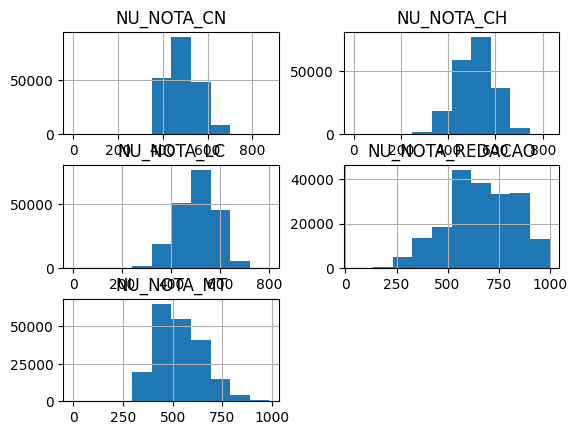

In [10]:
_db.hist(bins=10)

# 5
Realize a tarefa de regressão: predição do valor da prova a partir dos demais atributos

# a)

Defina e descreva seu método de avaliação e medidas de avaliação. (Para melhorar sua interpretação, inclua na sua avaliação avaliar os valores individuais esperados e preditos para uma pequena amostra de participantes do ENEM)


Resp:

## b)

Escolha um modelo de aprendizado de máquina. Faça experimentos com variações de parâmetros (se houver) do modelo de aprendizado de máquina.

199647 199647


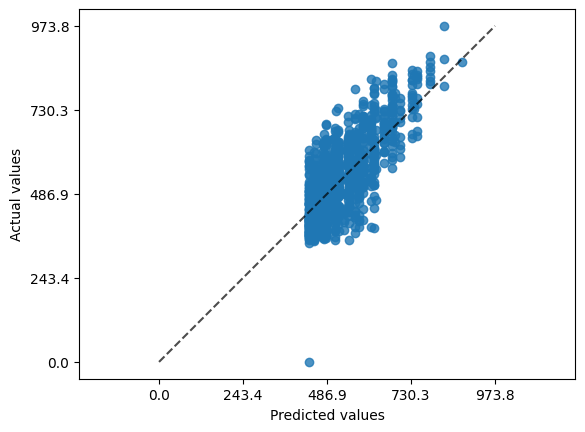

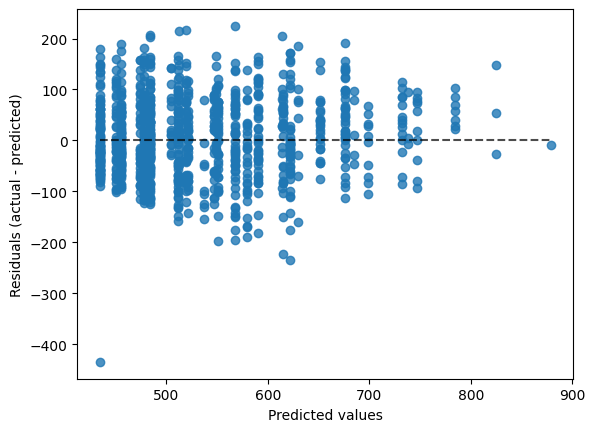

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import matplotlib.pyplot as plt


# Quebre em varios testes

X = get_db(colunas, _db)
y = get_db(["NU_NOTA_MT"],_db)["NU_NOTA_MT"].tolist()
print(len(X),len(y))

treereg = DecisionTreeRegressor(max_depth=5)

treereg.fit(X, y)

ypred = treereg.predict(X)

from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay.from_predictions(y_true=y, y_pred=ypred, kind="actual_vs_predicted")
display.plot()
plt.show()


In [15]:
from sklearn import metrics


# Evaluating Model's Performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y, ypred))
print('Mean Root Squared Error:', np.sqrt(metrics.mean_squared_error(y, ypred)))

print('Mean Absolute Error (percent):', metrics.mean_absolute_percentage_error(y, ypred))

print('Coefficient of Determination:', metrics.r2_score(y, ypred))


Mean Absolute Error: 63.37791887494342
Mean Squared Error: 6203.881645049448
Mean Root Squared Error: 78.76472335410979
Mean Absolute Error (percent): 169345911446859.84
Coefficient of Determination: 0.5170414528975374
